# ⌨ ***Chuẩn bị dữ liệu***

In [ ]:
import pandas as pd
# LOAD DỮ LIỆU TỪ FILE CSV VÀO THEO ĐƯỜNG DẪN RỒI ẤN CTRL + F9 ĐỂ CHẠY TẤT CẢ
file_path = '/content/2000_row_simulated_barn_data_standardized.csv'
# file_path = '/content/3000_row_simulated_barn_data_standardized.csv'
data = pd.read_csv(file_path)
# Hiển thị thông tin chung về dữ liệu
data.info(), data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   barn_temperature          1040 non-null   float64
 1   humidity                  1040 non-null   float64
 2   luminance                 1040 non-null   float64
 3   weather_clear_sky         1040 non-null   int64  
 4   weather_scattered_clouds  1040 non-null   int64  
 5   weather_overcast          1040 non-null   int64  
 6   weather_light_rain        1040 non-null   int64  
 7   hour_sin                  1040 non-null   float64
 8   hour_cos                  1040 non-null   float64
 9   ventilation_fan           1040 non-null   int64  
 10  heating_lamp              1040 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 89.5 KB


(None,
    barn_temperature  humidity  luminance  weather_clear_sky  \
 0              10.5      66.0      219.0                  0   
 1              30.7      83.0      368.0                  0   
 2              30.4      89.0        6.0                  0   
 
    weather_scattered_clouds  weather_overcast  weather_light_rain  hour_sin  \
 0                         0                 1                   0 -1.000000   
 1                         0                 1                   0  0.866025   
 2                         0                 1                   0 -1.000000   
 
        hour_cos  ventilation_fan  heating_lamp  
 0 -1.840000e-16                1             1  
 1  5.000000e-01                3             0  
 2 -1.840000e-16                3             0  )

# ***📖 Huấn luyện mô hình***

In [313]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Tách đặc trưng và nhãn
X = data.drop(columns=['ventilation_fan', 'heating_lamp'])
y_fan = data['ventilation_fan']
y_lamp = data['heating_lamp']

# Tách tập train và test 80% train / 20% test
X_train, X_test, y_train_fan, y_test_fan = train_test_split(X, y_fan, test_size=0.4, random_state=42)
X_train, X_test, y_train_lamp, y_test_lamp = train_test_split(X, y_lamp, test_size=0.4, random_state=42)

# Tạo mô hình cây quyết định và thực hiện K-Fold cross-validation (với 5 phần)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf_fan = DecisionTreeClassifier(random_state=42)
clf_lamp = DecisionTreeClassifier(random_state=42)

# Dự đoán trên K-Fold cho hai mô hình
y_pred_fan = cross_val_predict(clf_fan, X_train, y_train_fan, cv=kf)
y_pred_lamp = cross_val_predict(clf_lamp, X_train, y_train_lamp, cv=kf)

# Huấn luyện mô hình hoàn chỉnh để trực quan hóa cây quyết định
clf_fan.fit(X_train, y_train_fan)
clf_lamp.fit(X_train, y_train_lamp)

DecisionTreeClassifier(random_state=42)

*Decision Tree for Ventilation Fan*

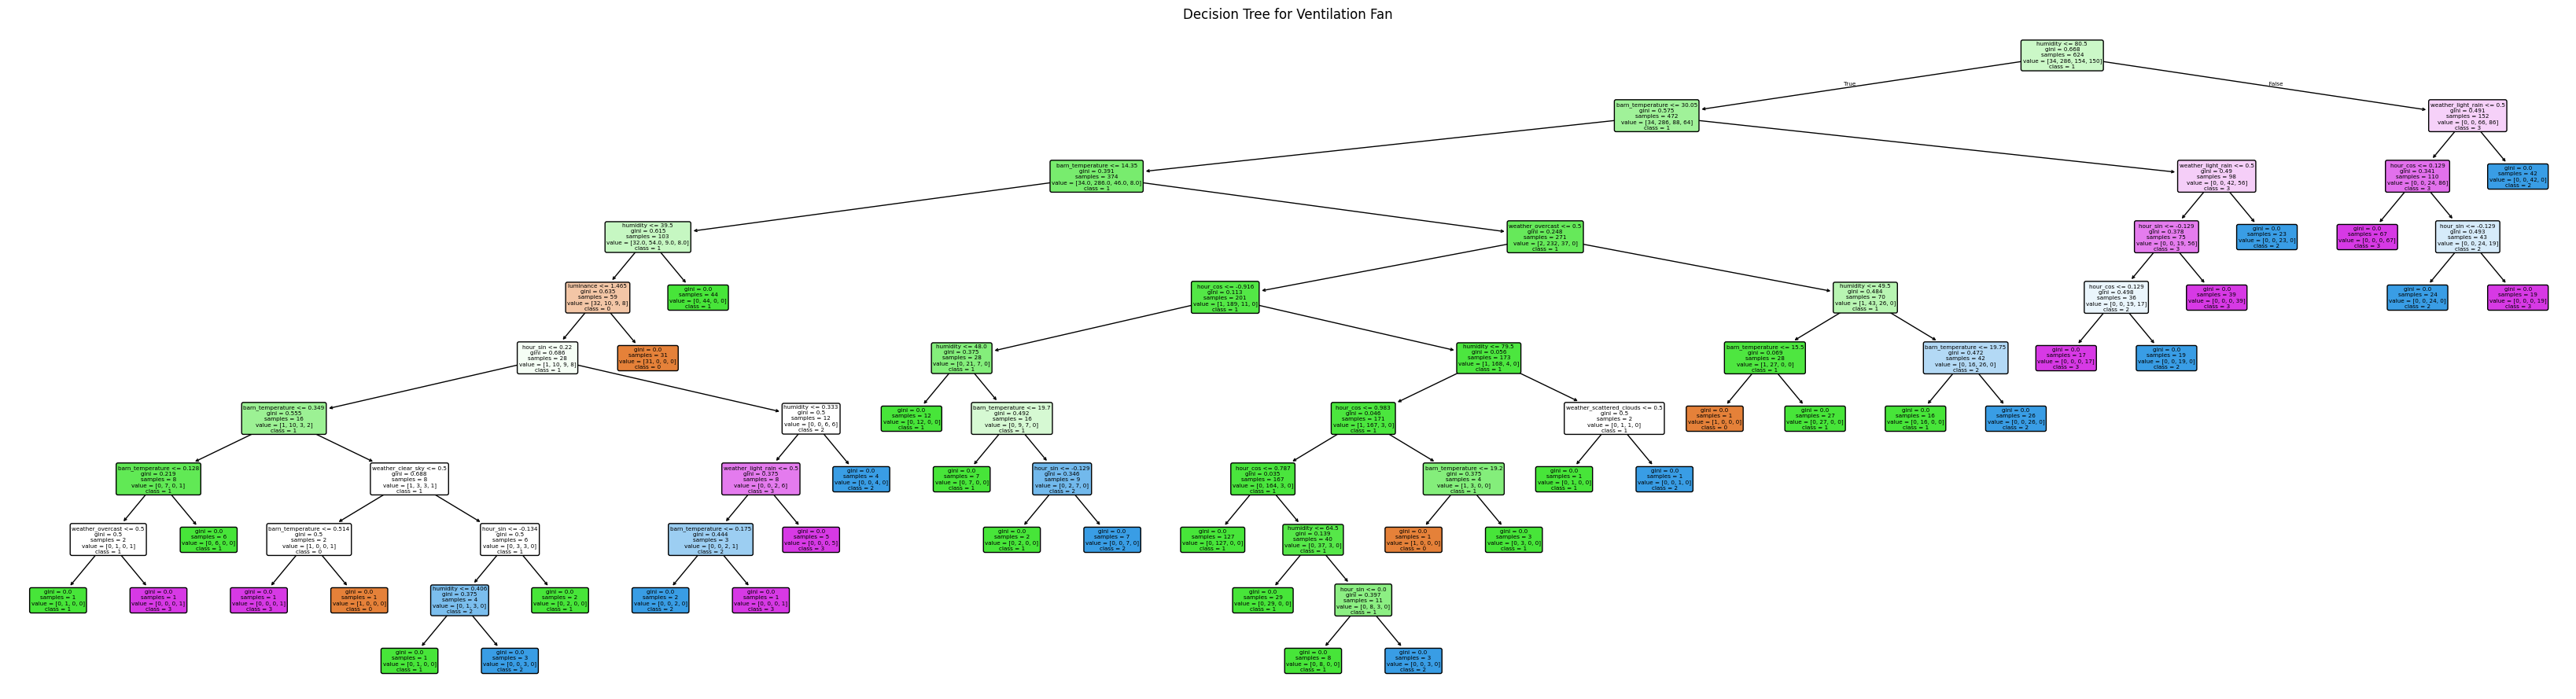

In [314]:
# Trực quan hóa cây quyết định cho ventilation_fan
plt.figure(figsize=(42, 11))
plot_tree(clf_fan, feature_names=X.columns, class_names=list(map(str, set(y_train_fan))), filled=True, rounded=True)
plt.title("Decision Tree for Ventilation Fan")
plt.show()

*Decision Tree for Heating Lamp*

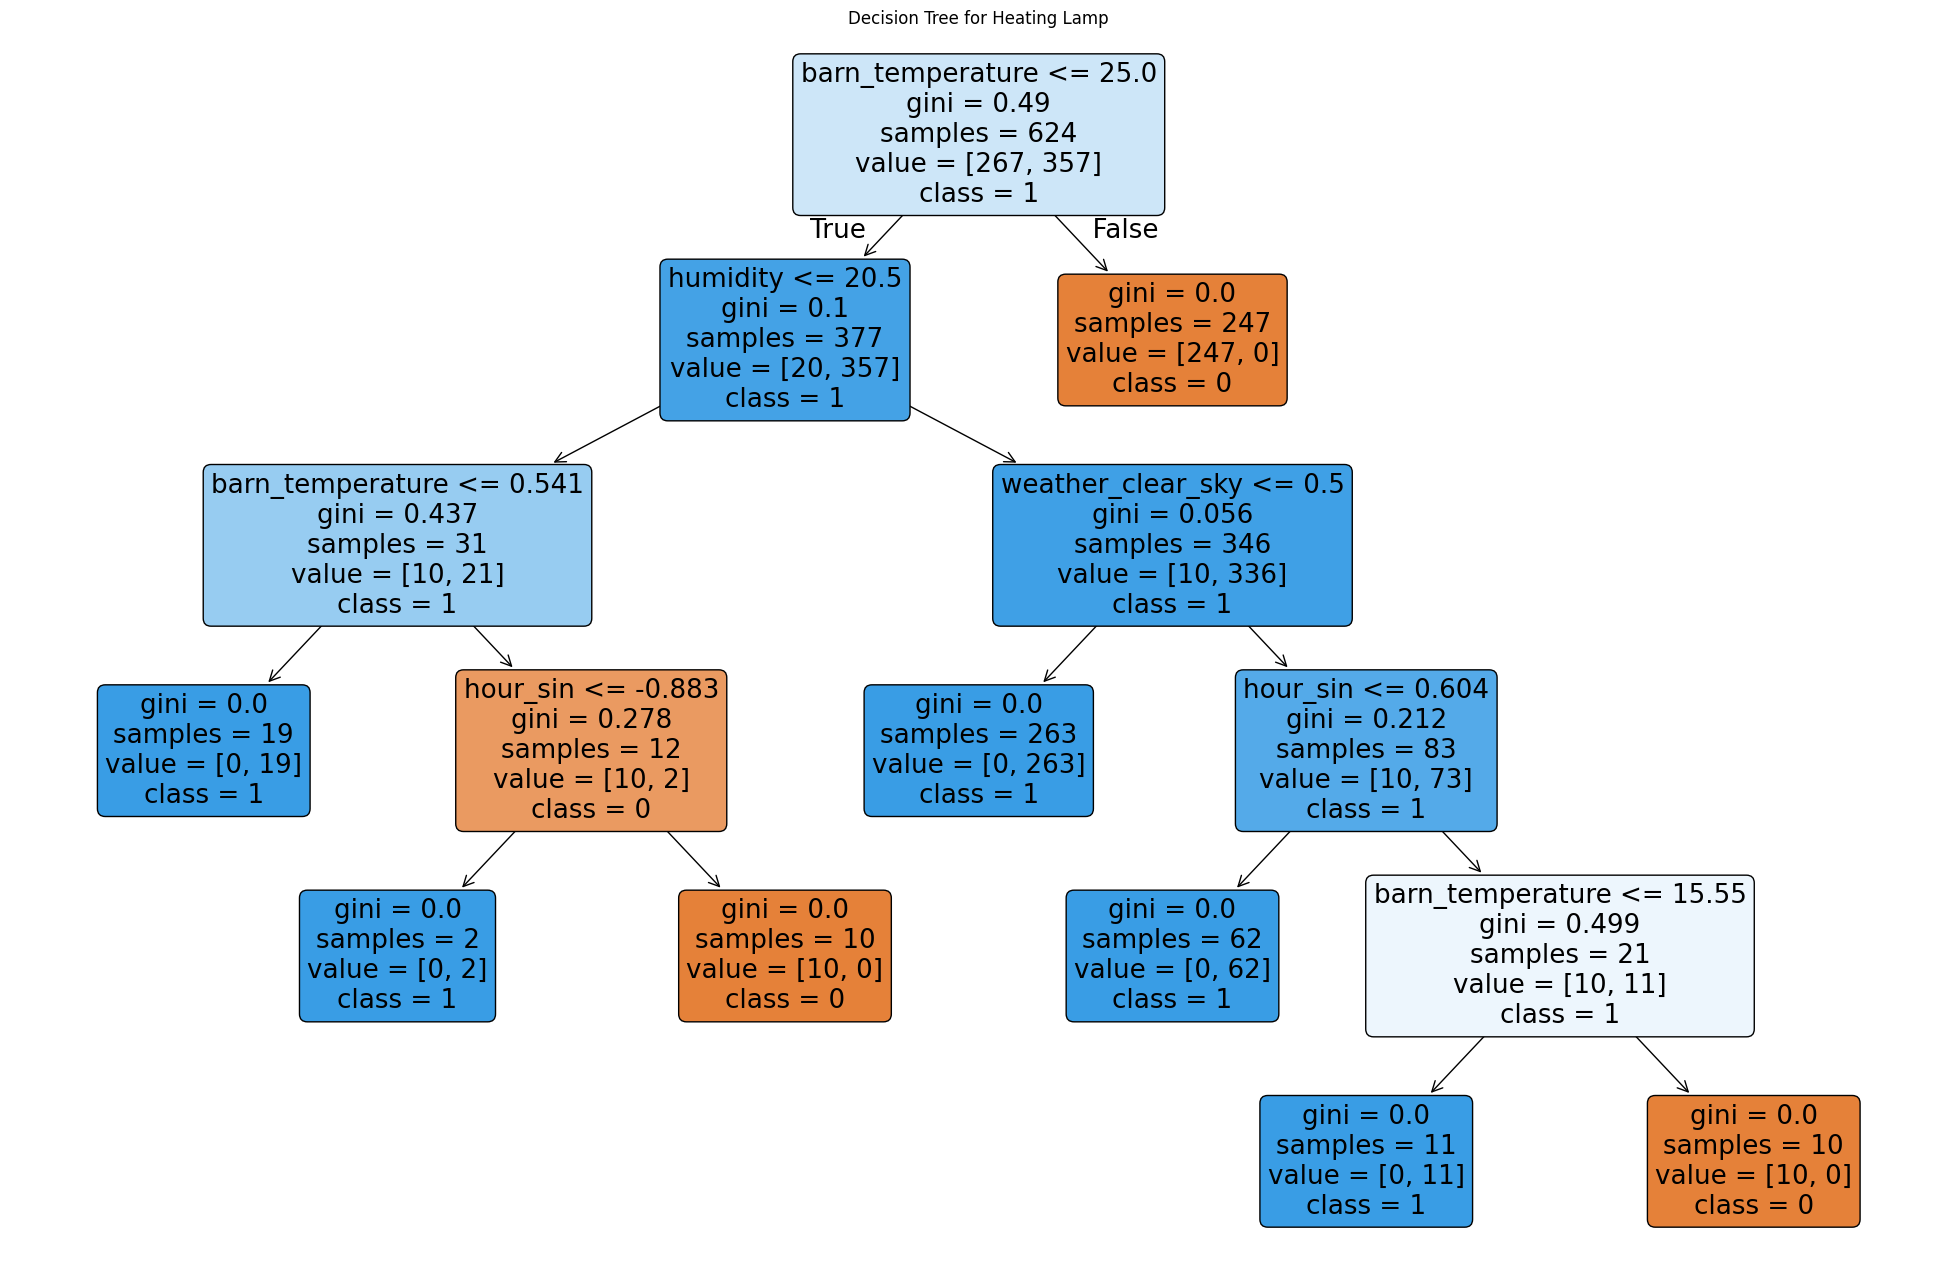

In [315]:
# Trực quan hóa cây quyết định cho heating_lamp
plt.figure(figsize=(25, 16))
plot_tree(clf_lamp, feature_names=X.columns, class_names=list(map(str, set(y_train_lamp))), filled=True, rounded=True)
plt.title("Decision Tree for Heating Lamp")
plt.show()

In [316]:
# Huấn luyện mô hình trên toàn bộ tập train để dự đoán trên tập test
clf_fan.fit(X_train, y_train_fan)
clf_lamp.fit(X_train, y_train_lamp)

# Dự đoán xác suất trên tập test
y_score_fan = clf_fan.predict_proba(X_test)
y_score_lamp = clf_lamp.predict_proba(X_test)

# Binarize y_test cho các lớp để tính ROC và AUC
y_test_fan_bin = label_binarize(y_test_fan, classes=[0, 1, 2, 3])
y_test_lamp_bin = label_binarize(y_test_lamp, classes=[0, 1])




## Tính trọng số đối với các nút nhánh và nút gốc

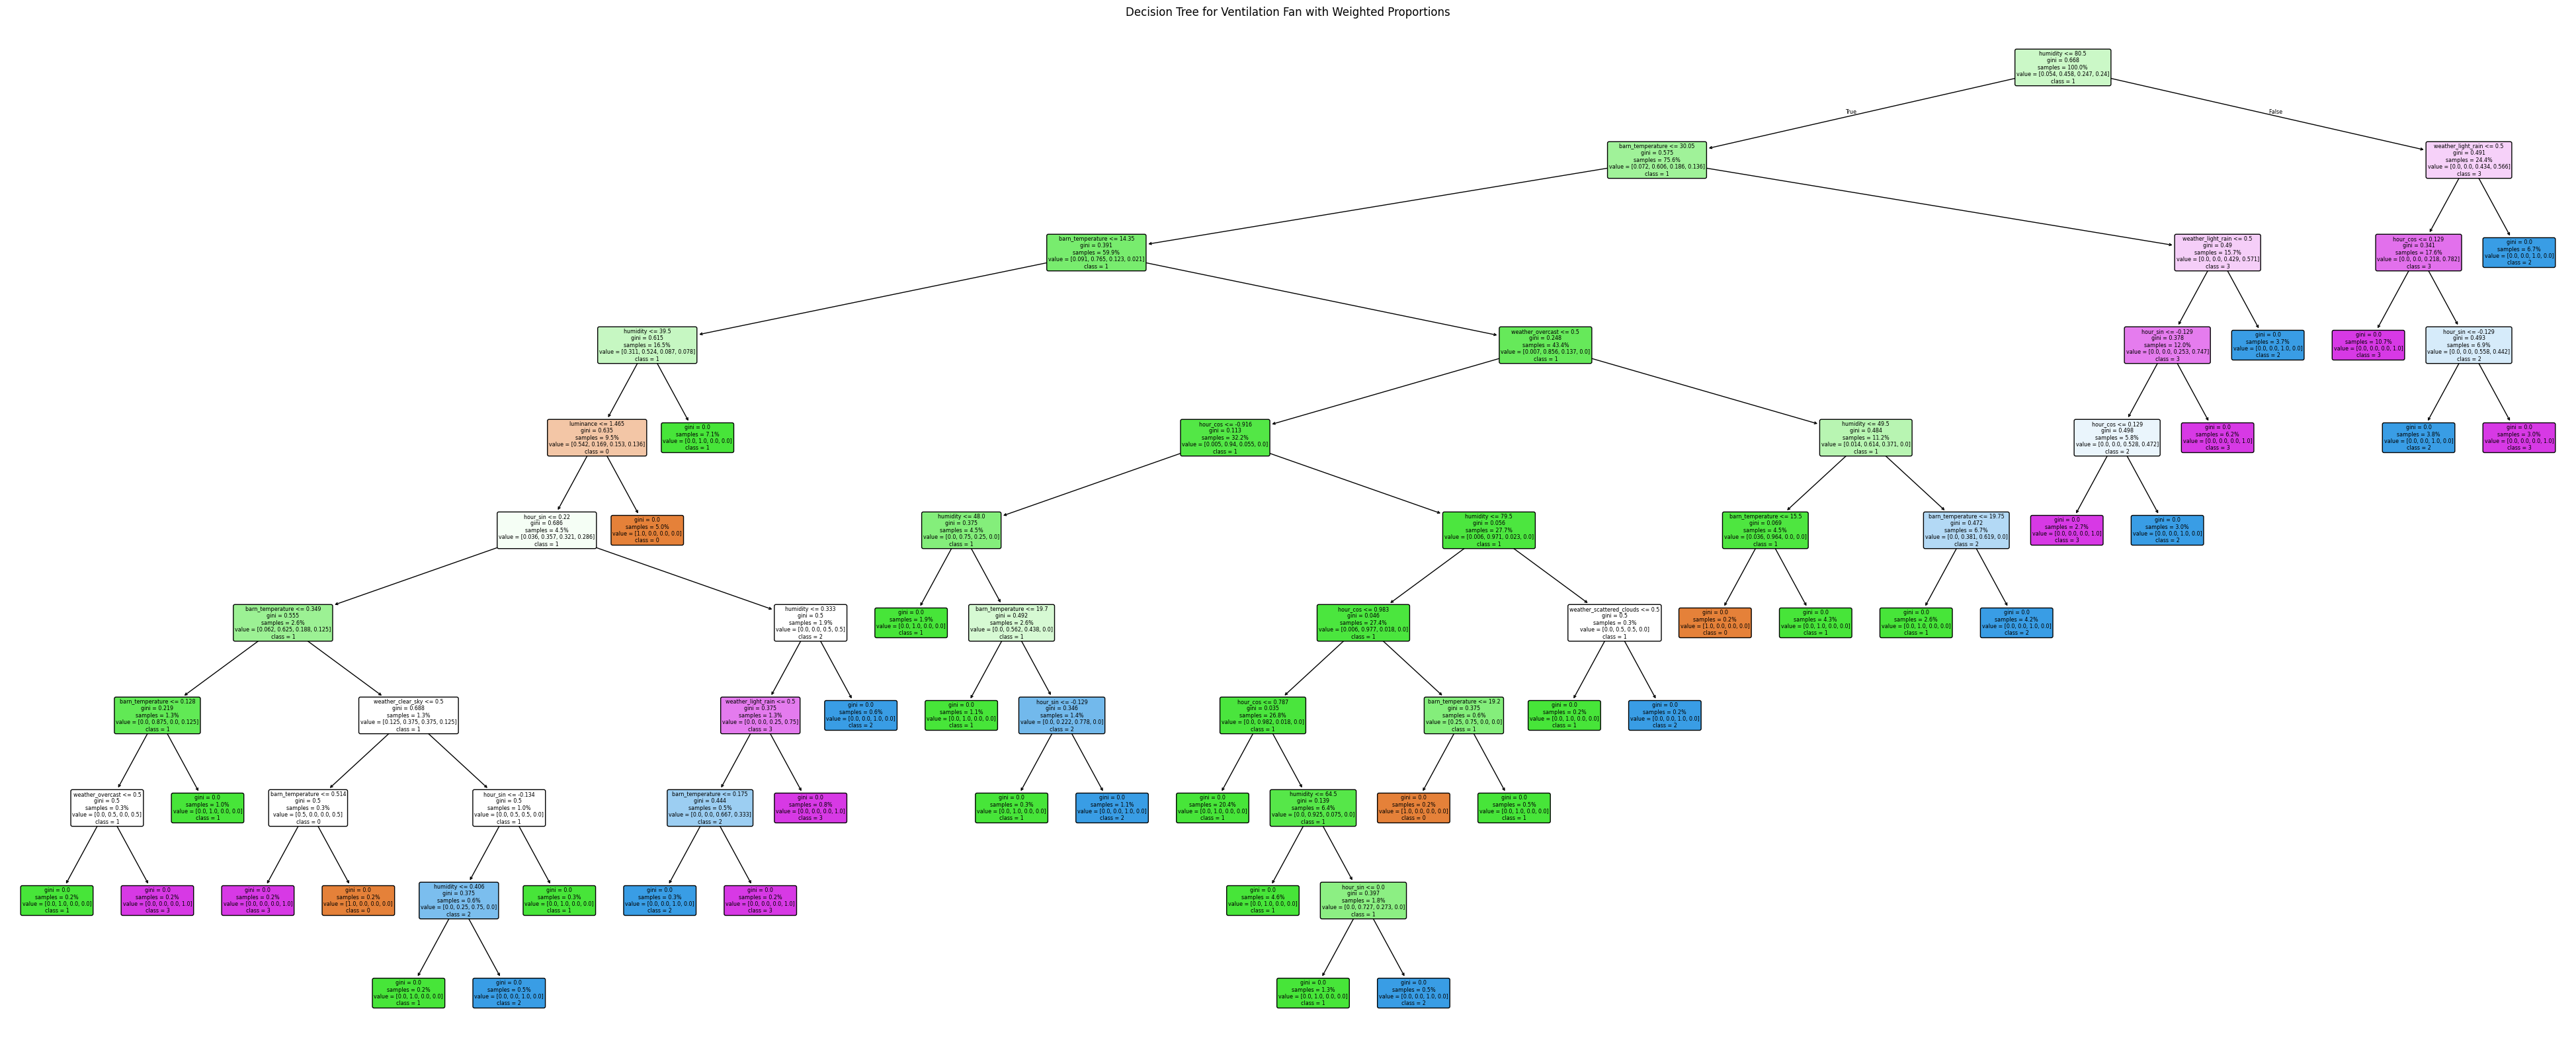

In [317]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Huấn luyện lại cây quyết định
clf_fan.fit(X_train, y_train_fan)
clf_lamp.fit(X_train, y_train_lamp)

# Trực quan hóa cây quyết định cho ventilation_fan với trọng số từng lớp
plt.figure(figsize=(50, 20))
plot_tree(
    clf_fan,
    feature_names=X.columns,
    class_names=list(map(str, set(y_train_fan))),
    filled=True,
    rounded=True,
    proportion=True  # Hiển thị tỷ lệ mẫu ở mỗi nút
)
plt.title("Decision Tree for Ventilation Fan with Weighted Proportions")
plt.show()




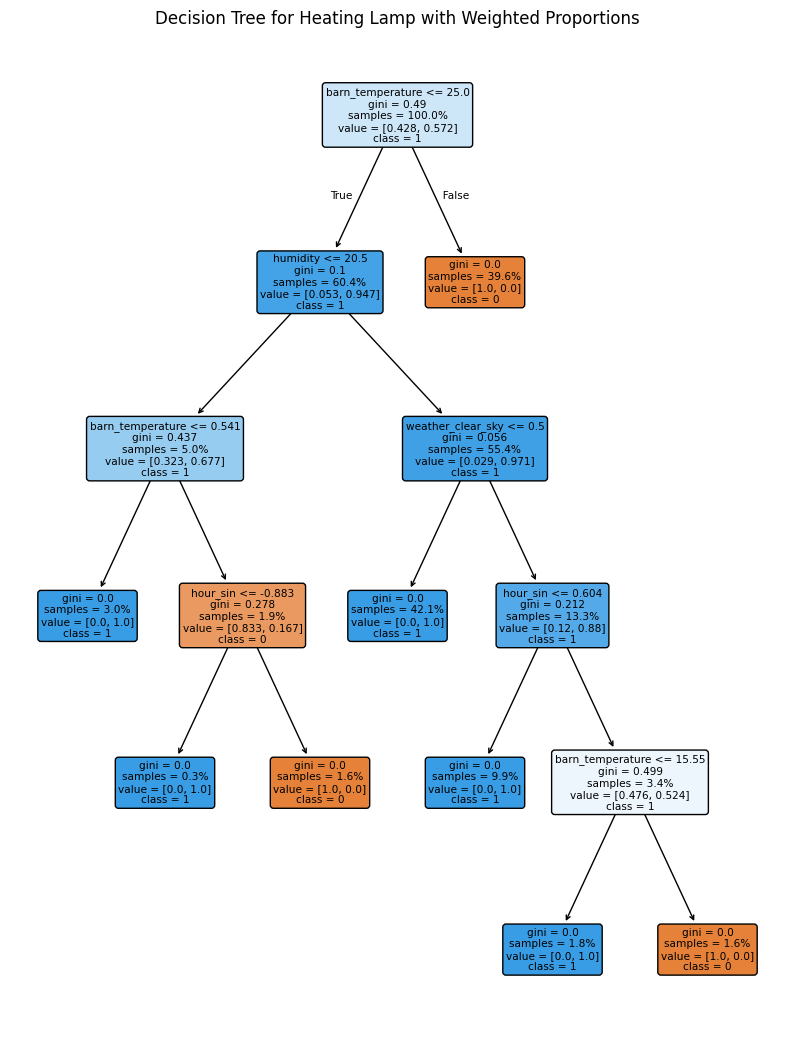

In [318]:
# Trực quan hóa cây quyết định cho heating_lamp với trọng số từng lớp
plt.figure(figsize=(10, 13))
plot_tree(
    clf_lamp,
    feature_names=X.columns,
    class_names=list(map(str, set(y_train_lamp))),
    filled=True,
    rounded=True,
    proportion=True  # Hiển thị tỷ lệ mẫu ở mỗi nút
)
plt.title("Decision Tree for Heating Lamp with Weighted Proportions")
plt.show()

# 💯 ***Đánh giá mô hình***

## F1-Score

In [319]:

from sklearn.metrics import classification_report

# Tạo báo cáo cho mô hình quạt thông gió
print("Classification Report for Ventilation Fan:")
print(classification_report(y_train_fan, y_pred_fan))

# Tạo báo cáo cho mô hình đèn sưởi
print("Classification Report for Heating Lamp:")
print(classification_report(y_train_lamp, y_pred_lamp))


# Tạo báo cáo cho mô hình quạt thông gió
report_fan = classification_report(y_train_fan, y_pred_fan, output_dict=True)
f1_micro_fan = report_fan['accuracy']
f1_macro_fan = report_fan['macro avg']['f1-score']

# Tạo báo cáo cho mô hình đèn sưởi
report_lamp = classification_report(y_train_lamp, y_pred_lamp, output_dict=True)
f1_micro_lamp = report_lamp['accuracy']
f1_macro_lamp = report_lamp['macro avg']['f1-score']

# In kết quả
print("F1 Score Report for Ventilation Fan:")
print(f"Micro F1-score: {f1_micro_fan:.2f}")
print(f"Macro F1-score: {f1_macro_fan:.2f}")

print("\nF1 Score Report for Heating Lamp:")
print(f"Micro F1-score: {f1_micro_lamp:.2f}")
print(f"Macro F1-score: {f1_macro_lamp:.2f}")



Classification Report for Ventilation Fan:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        34
           1       0.94      0.94      0.94       286
           2       0.89      0.93      0.91       154
           3       0.97      0.97      0.97       150

    accuracy                           0.93       624
   macro avg       0.93      0.90      0.91       624
weighted avg       0.93      0.93      0.93       624

Classification Report for Heating Lamp:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       267
           1       0.98      0.99      0.99       357

    accuracy                           0.99       624
   macro avg       0.99      0.98      0.99       624
weighted avg       0.99      0.99      0.99       624

F1 Score Report for Ventilation Fan:
Micro F1-score: 0.93
Macro F1-score: 0.91

F1 Score Report for Heating Lamp:
Micro F1-score: 0.99
Macro F1-score: 0.99

## ROC Curve

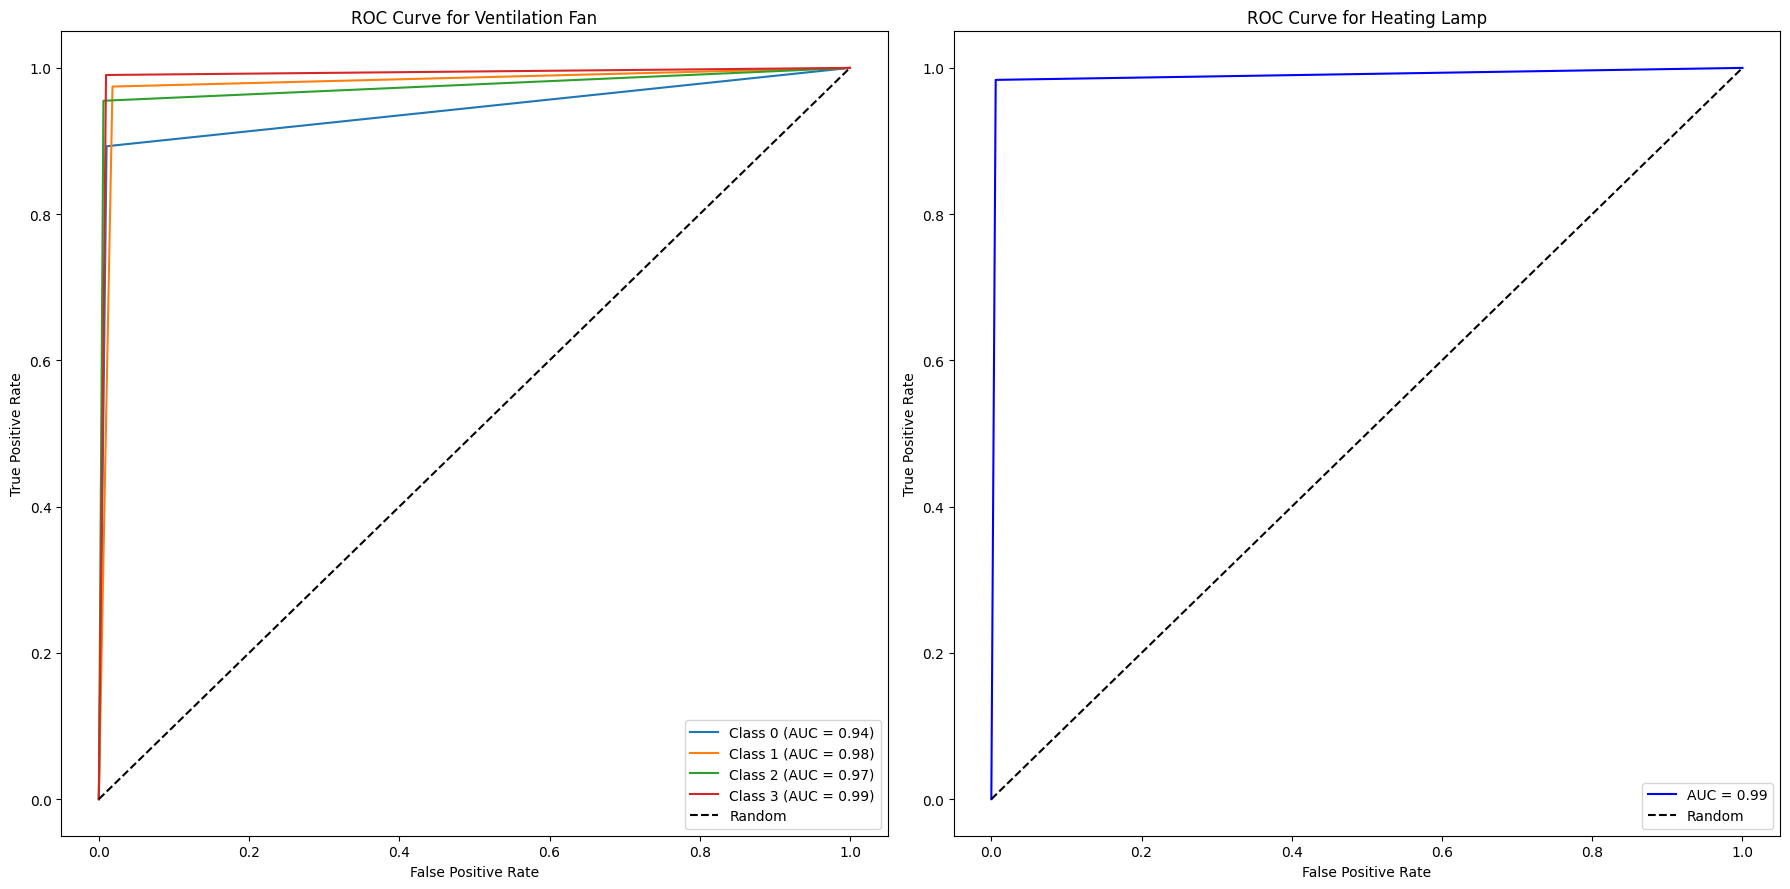

In [320]:
# Tính ROC AUC cho từng lớp của ventilation fan
fpr_fan, tpr_fan, roc_auc_fan = {}, {}, {}
for i in range(4):  # Có 3 lớp cho ventilation_fan
    fpr_fan[i], tpr_fan[i], _ = roc_curve(y_test_fan_bin[:, i], y_score_fan[:, i])
    roc_auc_fan[i] = auc(fpr_fan[i], tpr_fan[i])

# Tính ROC AUC cho heating lamp (nhị phân)
fpr_lamp, tpr_lamp, _ = roc_curve(y_test_lamp_bin, y_score_lamp[:, 1])
roc_auc_lamp = auc(fpr_lamp, tpr_lamp)

# Plot ROC curves
plt.figure(figsize=(18, 9))

# ROC cho ventilation fan
plt.subplot(1, 2, 1)
for i in range(4):
    plt.plot(fpr_fan[i], tpr_fan[i], label=f'Class {i} (AUC = {roc_auc_fan[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ventilation Fan')
plt.legend(loc="lower right")

# ROC cho heating lamp
plt.subplot(1, 2, 2)
plt.plot(fpr_lamp, tpr_lamp, color='b', label=f'AUC = {roc_auc_lamp:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heating Lamp')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# ***🧪Thử nghiệm mô hình***

In [321]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Bước 1: Đọc dữ liệu


# Tách đặc trưng và nhãn
X = data.drop(columns=['ventilation_fan', 'heating_lamp'])
y_fan = data['ventilation_fan']
y_lamp = data['heating_lamp']

# Tách tập train và test
X_train, X_test, y_train_fan, y_test_fan = train_test_split(X, y_fan, test_size=0.2, random_state=42)
X_train, X_test, y_train_lamp, y_test_lamp = train_test_split(X, y_lamp, test_size=0.2, random_state=42)

# Bước 2: Khởi tạo và huấn luyện mô hình
clf_fan = DecisionTreeClassifier(random_state=42)
clf_lamp = DecisionTreeClassifier(random_state=42)

clf_fan.fit(X_train, y_train_fan)
clf_lamp.fit(X_train, y_train_lamp)




DecisionTreeClassifier(random_state=42)

## Kiểm tra dự đoán trên mẫu test

In [322]:
# Bước 3: Kiểm tra dự đoán trên một mẫu cố định
sample_input = X_test.iloc[[21]]  # Chọn một mẫu từ tập test
sample_pred_fan = clf_fan.predict(sample_input)
sample_pred_lamp = clf_lamp.predict(sample_input)

from IPython.display import display  # Để đảm bảo hiển thị đẹp trong notebook
display(sample_input)
print("Predicted Ventilation Fan Output:", sample_pred_fan[0])
print("Predicted Heating Lamp Output:", sample_pred_lamp[0])

,barn_temperature,humidity,luminance,weather_clear_sky,weather_scattered_clouds,weather_overcast,weather_light_rain,hour_sin,hour_cos
811,25.2,98.0,143.0,1,0,0,0,-0.965926,-0.258819


Predicted Ventilation Fan Output: 3
Predicted Heating Lamp Output: 0


## ✨ Định dạng lại output để kết quả dự đoán dễ nhìn hơn ✨

In [323]:
import math

def interpret_single_record(input_row, fan_prediction, lamp_prediction):
    # Lấy các giá trị từ hàng dữ liệu
    temperature = input_row["barn_temperature"].values[0]
    humidity = input_row["humidity"].values[0]
    luminance = input_row["luminance"].values[0]

    # Xác định thời tiết
    if input_row["weather_clear_sky"].values[0] == 1:
        weather = "Clear Sky"
    elif input_row["weather_scattered_clouds"].values[0] == 1:
        weather = "Scattered Clouds"
    elif input_row["weather_overcast"].values[0] == 1:
        weather = "Overcast"
    elif input_row["weather_light_rain"].values[0] == 1:
        weather = "Light Rain"
    else:
        weather = "Unknown"

    # Tính giờ từ hour_sin và hour_cos
    hour_sin = input_row["hour_sin"].values[0]
    hour_cos = input_row["hour_cos"].values[0]
    hour_angle = math.atan2(hour_sin, hour_cos)
    if hour_angle < 0:
        hour_angle += 2 * math.pi
    hour = int((hour_angle / (2 * math.pi)) * 24)

    # Lấy dự đoán mức độ quạt và đèn sưởi
    fan_level = fan_prediction
    heating_lamp_status = "On" if lamp_prediction == 1 else "Off"

    # Hiển thị kết quả diễn giải
    result = {
        "Temperature (°C)": temperature,
        "Humidity (%)": humidity,
        "Luminance (cd/m²)": luminance,
        "Weather": weather,
        "Hour (approx)": f"{hour}:00",
        "Predicted Ventilation Fan Level": fan_level,
        "Predicted Heating Lamp Status": heating_lamp_status
    }

    return result

# Chuyển sample_input thành DataFrame giống với mẫu dữ liệu đầu vào
import pandas as pd
sample_input_df = pd.DataFrame(sample_input)

# Hiển thị kết quả giải thích
interpreted_result = interpret_single_record(sample_input_df, sample_pred_fan, sample_pred_lamp)
for key, value in interpreted_result.items():
    print(f"{key}: {value}")


Temperature (°C): 25.2
Humidity (%): 98.0
Luminance (cd/m²): 143.0
Weather: Clear Sky
Hour (approx): 17:00
Predicted Ventilation Fan Level: [3]
Predicted Heating Lamp Status: Off


##  ***📁Export mô hình bằng pickle***

In [324]:
import pickle

# Lưu mô hình clf_fan và clf_lamp
with open("clf_fan_model.pkl", "wb") as fan_file:
    pickle.dump(clf_fan, fan_file)

with open("clf_lamp_model.pkl", "wb") as lamp_file:
    pickle.dump(clf_lamp, lamp_file)


Github